# Data Science

### Muhammad Bilal

# Task 1:
## Titanic Classification
### Make a system which tells whether the person will be save from sinking. What factors were most likely lead to success-socio-economic status, age, gender and more.

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


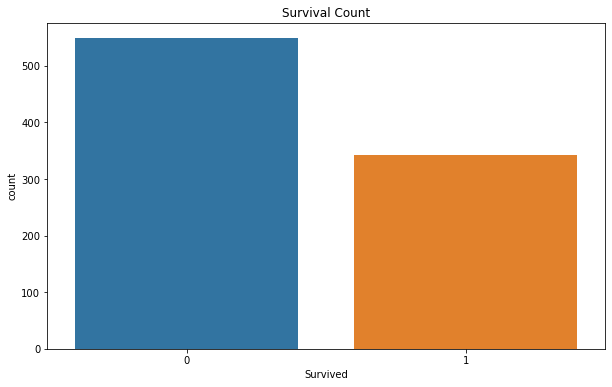

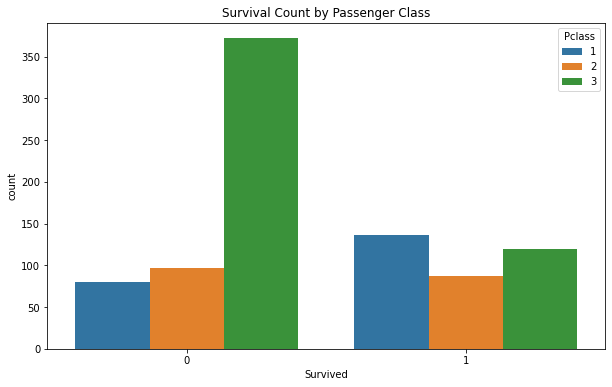

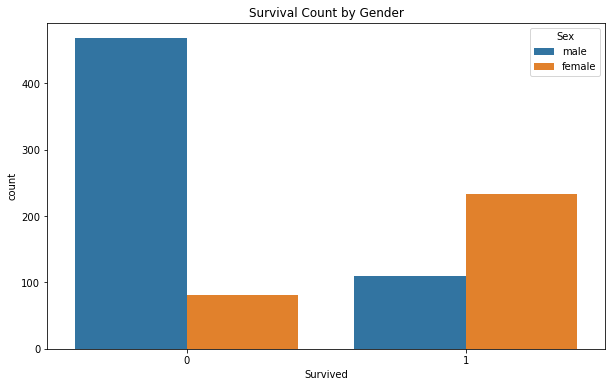

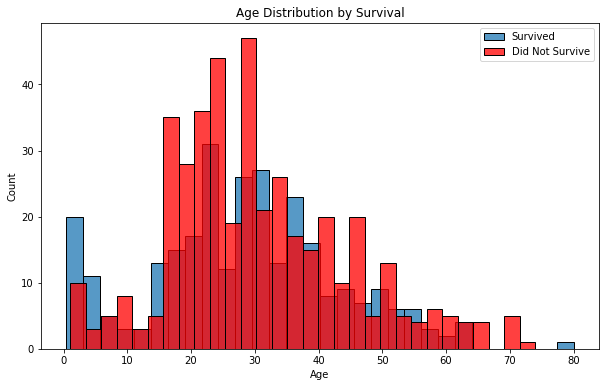

Training Accuracy: 0.800561797752809
Testing Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Feature Importance:
       Feature  Coefficient
4        Fare     0.126579
6  Embarked_Q    -0.046344
3       Parch    -0.096673
7  Embarked_S    -0.189756
2       SibSp    -0.349278
1         Age    -0.396010
0      Pclass    -0.785320
5    Sex_male    -1.277180


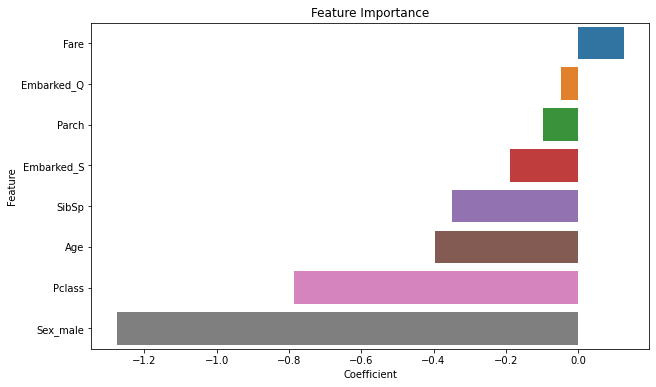

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# Display the first few rows of the dataset
print(titanic_df.head())

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Pclass', data=titanic_df)
plt.title('Survival Count by Passenger Class')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.title('Survival Count by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(titanic_df[titanic_df['Survived'] == 1]['Age'], kde=False, bins=30, label='Survived')
sns.histplot(titanic_df[titanic_df['Survived'] == 0]['Age'], kde=False, bins=30, color='red', label='Did Not Survive')
plt.legend()
plt.title('Age Distribution by Survival')
plt.show()

# Data Preprocessing
# Drop columns that won't be used and handle missing values
titanic_df = titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Convert categorical features to numeric
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

# Define the features and the target variable
X = titanic_df.drop(columns='Survived')
y = titanic_df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Feature Importance Analysis
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("Feature Importance:\n", feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()
